In [2]:
# import sys
# sys.path.insert(1, '..')
from MDSplus import *
import database
import plasma
import matplotlib.pyplot as plt
import importlib
import pandas as pd
from IPython.display import display
importlib.reload(database)
importlib.reload(plasma)

<module 'plasma' from '/home/hmturner/Documents/disruption-warning-db-workflow/src/plasma.py'>

In [30]:
nan_df = pd.read_csv("../percent_nan.csv")
none_df = pd.read_csv("../percent_none.csv")

In [33]:
none_df.describe().sort_values(by='min',axis=1, ascending=False)

,shot,Mirnov_norm_bpol,H98,v_mid,r_dd,v_edge,power_supply_railed,v_0_uncalibrated,dprad_dt,dWmhd_dt,ssep,Greenwald_fraction,p_oh,p_rad,v_loop,dipprog_dt,n_e,Te_width,Te_width_ECE,intentional_disruption,ip,Wmhd,n_over_ncrit,n_equal_1_mode,Mirnov,Mirnov_norm_btor,Te_peaking,ne_peaking,Te_peaking_ECE,SXR_peaking,kappa_area,I_efc,SXR,H_alpha,zcur,upper_gap,dli_dt,dbetap_dt,shot.1,time,time_until_disrupt,ip_error,dip_dt,beta_p,beta_n,li,n_equal_1_normalized,z_error,v_z,z_times_v_z,kappa,pressure_peaking,q0,qstar,q95,v_0,dn_dt,p_rad_slow,p_oh_slow,p_icrf,p_lh,radiated_fraction,v_loop_efit,lower_gap,dbkey,Prad_peaking_CVA
count,1.043500e+04,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0
mean,1.120598e+09,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,4.076817e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.050204e+09,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.120131e+09,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.140226e+09,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.150812e+09,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.160930e+09,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
pd.options.display.max_columns = None
nan_df.describe().sort_values(by='min',axis=1,ascending=False)
# For V_edge and v_mid, would need to talk to John Rice but probably unlikely not enough Xray emissions for good readings
# Mirnov_norm_bpol might be worth attempting, H98 in theory possible but also unlikely
# Ignore the rest 

,shot,Mirnov_norm_bpol,r_dd,power_supply_railed,v_edge,v_mid,H98,Te_width_ECE,Te_peaking_ECE,v_0_uncalibrated,v_0,ne_peaking,pressure_peaking,Te_peaking,SXR_peaking,dipprog_dt,v_loop,p_rad,H_alpha,p_oh,SXR,ssep,dWmhd_dt,dprad_dt,I_efc,Te_width,Greenwald_fraction,kappa_area,intentional_disruption,zcur,Wmhd,n_over_ncrit,n_equal_1_mode,Mirnov,Mirnov_norm_btor,n_e,upper_gap,ip,kappa,shot.1,time,time_until_disrupt,ip_error,dip_dt,beta_p,beta_n,li,n_equal_1_normalized,z_error,v_z,z_times_v_z,q0,dli_dt,qstar,q95,dn_dt,p_rad_slow,p_oh_slow,p_icrf,p_lh,radiated_fraction,v_loop_efit,lower_gap,dbkey,dbetap_dt,Prad_peaking_CVA
count,1.043500e+04,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.0,10435.0,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.0,10435.000000,10435.000000
mean,1.120598e+09,100.0,100.0,100.0,100.0,100.0,100.0,89.575664,58.360821,95.143838,96.644575,51.667330,51.667330,34.753382,29.954582,4.882878,0.885925,0.997727,1.294388,1.615408,73.749349,1.296456,1.296456,0.997727,0.293061,28.849698,5.538912,1.645412,75.711252,0.978571,1.296456,1.378217,24.272733,25.069137,25.337465,0.716332,1.296456,0.531350,1.297525,0.0,0.0,63.632008,4.273105,0.531350,1.296456,1.771514,1.296456,24.272733,0.978571,18.680335,18.680335,1.296456,1.296456,1.297525,1.299096,0.716332,82.549114,82.549114,0.521766,0.521766,2.091368,70.681554,1.296456,0.0,1.296456,81.126980
std,4.076817e+07,0.0,0.0,0.0,0.0,0.0,0.0,26.242242,38.042906,20.108050,16.936495,44.870034,44.870034,38.384726,40.867621,11.313649,8.247055,9.125156,9.851504,11.317153,43.921972,9.844503,9.844503,9.125156,3.084504,39.006319,11.596915,10.078662,40.718065,2.923190,9.844503,9.844934,42.769322,43.199689,43.353450,7.018990,9.844503,5.749391,9.844470,0.0,0.0,48.108109,11.324626,5.749391,9.844503,9.904731,9.844503,42.769322,2.923190,34.701485,34.701485,9.844503,9.844503,9.844470,9.844432,7.018990,37.956465,37.956465,5.666320,5.666320,13.349085,45.317423,9.844503,0.0,9.844503,37.727789
min,1.050204e+09,100.0,100.0,100.0,100.0,100.0,100.0,4.597701,4.166667,2.083333,2.083333,2.000000,2.000000,2.000000,1.694915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.120131e+09,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,20.618557,100.000000,100.000000,6.250000,6.250000,5.494505,2.127660,3.092784,0.000000,0.000000,0.000000,0.000000,1.342342,0.000000,0.000000,0.000000,0.000000,1.030928,0.000000,0.000000,36.206897,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.125000,3.125000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,1.041667,0.000000,0.0,0.000000,100.000000
50%,1.140226e+09,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,47.142857,100.000000,100.000000,27.522936,27.522936,15.789474,4.166667,3.157895,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,5.

In [6]:
data_handler = database.DatabaseHandler.create_cmod_handler()
test_shots = data_handler.get_shots([1050204013,1050207007,1050207015])

/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [8]:
test_shots[0].data.head(10)

,dbkey,shot,time,time_until_disrupt,ip_error,dip_dt,beta_p,beta_n,li,n_equal_1_normalized,...,Te_peaking,ne_peaking,Te_peaking_ECE,SXR_peaking,kappa_area,I_efc,SXR,H_alpha,Prad_peaking_CVA,commit_hash
1,1170009,1050204013,0.0600,0.0875,NaN,-5091091.00,-0.244246,-0.223677,1.456553,None,...,None,None,None,None,1.108383,-124.896126,-3132.696289,2.849908,None,None
4,1170010,1050204013,0.0800,0.0675,NaN,-4700152.50,-0.073123,-0.085693,1.188475,None,...,None,None,None,None,1.167799,-663.336792,-2553.273193,3.665160,None,None
7,1170011,1050204013,0.1000,0.0475,-40536.43750,-3921634.25,-0.026750,-0.037636,1.237543,None,...,None,None,None,None,1.161623,-1395.269653,-1684.003418,4.133093,None,None
10,1170012,1050204013,0.1200,0.0275,-9288.87500,-2739633.00,-0.044761,-0.064668,1.409911,None,...,None,None,None,None,1.173263,-2079.201172,-814.962097,4.432989,None,None
18,1170013,1050204013,0.1275,0.0200,31874.34375,9394838.00,0.016935,0.022740,1.416342,None,...,None,None,None,None,1.202466,-1789.609741,-3036.036865,10.653203,None,None
19,1170014,1050204013,0.1285,0.0190,50597.34375,14869025.00,0.063607,0.083066,1.430161,None,...,None,None,None,None,1.202266,-1588.439941,-1684.209473,5.322748,None,None
22,1170015,1050204013,0.1295,0.0180,67752.81250,-20362880.00,0.071765,0.092462,1.436723,None,...,None,None,None,None,1.204585,-2054.858887,-1298.909424,5.510432,None,None
23,1170016,1050204013,0.1305,0.0170,60799.65625,15651824.00,0.058842,0.075825,1.410157,None,...,None,None,None,None,1.209482,-1813.865967,-1877.426025,6.792007,None,None
26,1170017,1050204013,0.1315,0.0160,79207.78125,22706104.00,0.017622,0.022430,1.561010,None,...,None,None,None,None,1.196215,-2348.591553,-911.531738,5.975024,None,None
27,1170018,1050204013,0.1325,0.0150,83523.34375,13303290.00,0.027393,0.034452,1.653936,None,...,None,None,None,None,1.190166,-2417.023682,-1490.796753,6.975251,None,None


In [8]:
grouped_df = disruptions_df.drop(columns=['commit_hash']).groupby(by=["shot"])

In [12]:
percent_missing = grouped_df.apply(lambda group: group.isnull().sum()*100/len(group))

In [15]:
percent_none= grouped_df.apply(lambda group: (group==None).sum()*100/len(group))
percent_none

,dbkey,shot,time,time_until_disrupt,ip_error,dip_dt,beta_p,beta_n,li,n_equal_1_normalized,...,Mirnov_norm_bpol,Te_peaking,ne_peaking,Te_peaking_ECE,SXR_peaking,kappa_area,I_efc,SXR,H_alpha,Prad_peaking_CVA
shot,,,,,,,,,,,,,,,,,,,,,
1050204013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050207007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050207015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050207018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050207022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160930037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1160930038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1160930039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,dbkey,shot,time,time_until_disrupt,ip_error,dip_dt,beta_p,beta_n,li,n_equal_1_normalized,...,Mirnov_norm_bpol,Te_peaking,ne_peaking,Te_peaking_ECE,SXR_peaking,kappa_area,I_efc,SXR,H_alpha,Prad_peaking_CVA
count,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,...,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Using the data handler

In [115]:
disruption_shots

,shot,t_disrupt
0,930519014,0.1240
1,930519019,0.1130
2,930519027,0.1210
3,930519028,0.1275
4,930520004,0.1195
...,...,...
13780,1160930037,1.6529
13781,1160930038,1.4175
13782,1160930039,1.3723
13783,1160930040,1.4963


In [ ]:
na_value_dict = {}
for disruption_shot in disruption_shots['shot'][13000:13020]:
    try:
        shot = test_handler.get_shot(disruption_shot)
        n = len(shot.data)
        # for col in shot.data.columns[shot.data.isna().any()].tolist():
            
        #     if col not in na_value_dict:
        #         na_value_dict[col] = 0
        #     na_value_dict[col]+=1
        print(pd.unique(shot.data['intentional_disruption']))
    except Exception as e:
        print(f"Bad shot_id:{disruption_shot} with error:{e}")

In [127]:
print(na_value_dict)

{'ip_error': 20, 'beta_n': 7, 'v_z': 20, 'z_times_v_z': 20, 'pressure_peaking': 20, 'H98': 20, 'v_0': 20, 'v_mid': 20, 'v_edge': 20, 'power_supply_railed': 20, 'r_dd': 20, 'dipprog_dt': 20, 'v_0_uncalibrated': 20, 'Te_width': 20, 'Greenwald_fraction': 20, 'Te_width_ECE': 20, 'Mirnov_norm_bpol': 20, 'Te_peaking': 20, 'ne_peaking': 20, 'Te_peaking_ECE': 20, 'SXR_peaking': 20, 'Prad_peaking_CVA': 20, 'commit_hash': 20, 'SXR': 19, 'n_over_ncrit': 2, 'kappa_area': 3, 'Mirnov': 1, 'Mirnov_norm_btor': 1}


In [35]:
    test_handler = database.DatabaseHandler.create_cmod_handler()
    disruption_shots = test_handler.get_disruption_shotlist()
    test_shot = test_handler.get_shot('1150922001') # Make default time sorted 
    test_shot.data.sort_values('time')

/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,dbkey,shot,time,time_until_disrupt,ip_error,dip_dt,beta_p,beta_n,li,n_equal_1_normalized,z_error,v_z,z_times_v_z,kappa,pressure_peaking,H98,q0,qstar,q95,v_0,v_mid,v_edge,dn_dt,p_rad_slow,p_oh_slow,p_icrf,p_lh,radiated_fraction,power_supply_railed,v_loop_efit,r_dd,lower_gap,upper_gap,dbetap_dt,dli_dt,ip,zcur,n_e,dipprog_dt,v_loop,p_rad,p_oh,ssep,dWmhd_dt,dprad_dt,v_0_uncalibrated,Te_width,Greenwald_fraction,intentional_disruption,Te_width_ECE,Wmhd,n_over_ncrit,n_equal_1_mode,Mirnov,Mirnov_norm_btor,Mirnov_norm_bpol,Te_peaking,ne_peaking,Te_peaking_ECE,SXR_peaking,kappa_area,I_efc,SXR,H_alpha,Prad_peaking_CVA,commit_hash
0,21457,1150922001,0.06,None,NaN,6.260080e+06,-0.659388,-0.728985,1.882671,0.001876,-0.071723,NaN,NaN,1.121306,NaN,None,1.043756,7.524931,6.345780,None,None,None,7.714980e+20,151130.841212,-3.147100e+05,90.816960,0.0,0.746004,None,3.997224,None,0.124971,0.163172,21.634546,-35.228939,362075.570106,-0.073188,3.315959e+19,NaN,5.075586,56568.955421,7.573850e+04,0.4,489418.858596,1.372725e+07,None,NaN,0.144505,0,NaN,-25292.869141,0.140618,0.010143,0.992666,0.183565,None,NaN,NaN,NaN,NaN,1.079643,233.430786,None,2.794032,None,None
1,21458,1150922001,0.08,None,NaN,5.876882e+06,-0.226697,-0.308375,1.178092,0.001802,-0.071723,NaN,NaN,1.224313,1.779713,None,1.078733,6.259056,5.815024,None,None,None,2.359324e+20,163061.734848,4.257106e+05,93.612703,0.0,0.078799,None,3.908666,None,0.120500,0.141302,12.437053,-20.013364,482791.882656,-0.073188,5.039277e+19,NaN,5.164196,81317.873955,1.031871e+06,0.4,217329.370801,1.818398e+07,None,NaN,0.161085,0,NaN,-15504.492188,0.352229,0.009742,0.965687,0.178576,None,1.706439,1.236412,NaN,1.119683,1.168232,848.607849,None,4.332554,None,None
2,21459,1150922001,0.10,None,38626.742188,1.954519e+06,-0.161906,-0.261717,1.082136,0.001470,-0.071723,NaN,NaN,1.250246,1.965235,None,1.120945,5.319927,4.939097,None,None,None,-3.709589e+20,266977.899302,8.425468e+05,94.327552,0.0,0.105688,None,3.586226,None,0.109953,0.135687,3.217918,-0.927791,588626.742084,-0.073188,6.552998e+19,NaN,4.257461,130815.711021,1.237654e+06,0.4,73384.913750,2.990506e+07,None,NaN,0.174115,0,NaN,-16599.695312,0.360872,0.007944,1.274575,0.235844,None,1.867273,1.312129,NaN,0.954083,1.198124,631.827820,None,5.619932,None,None
3,21460,1150922001,0.12,None,71370.562500,1.568255e+06,-0.097981,-0.171079,1.140980,0.001129,-0.000871,5.894237,-0.047921,1.261705,1.913298,None,1.126533,5.081687,4.593039,None,None,None,1.297752e+21,254864.236748,1.774811e+06,90.806934,0.0,0.067479,None,3.225115,None,0.086379,0.133381,3.184496,0.534153,656106.812500,0.008129,8.090278e+19,1736815.500,3.882335,148866.971971,2.206017e+06,0.4,295953.589185,6.426238e+07,None,NaN,0.205348,0,NaN,-12569.095703,0.360295,0.006097,1.396008,0.258361,None,1.880445,1.254971,NaN,1.425348,1.206939,885.036987,None,5.894803,None,None
4,21461,1150922001,0.14,None,65597.859375,1.568518e+06,-0.034526,-0.059190,1.103502,0.000950,-0.000114,-0.515161,0.004572,1.353420,1.960144,None,1.102749,5.276523,4.798643,None,None,None,6.625670e+20,301082.098763,1.453350e+06,92.566726,0.0,0.116679,None,2.842839,None,0.078580,0.127583,1.320451,2.764684,685070.421658,0.008886,9.399234e+19,1736809.000,2.690682,157424.350159,1.349111e+06,0.4,153448.843762,-3.716542e+07,None,NaN,0.218763,0,NaN,-4761.549805,0.560931,0.005132,1.318730,0.244103,None,1.878983,1.275530,NaN,1.894669,1.283828,1013.405640,None,7.039805,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,21547,1150922001,1.86,None,32055.292969,-3.915295e+06,0.231375,0.262650,2.017792,0.001190,0.000449,2.674398,-0.013694,1.116271,2.358192,None,0.949946,7.355473,5.732841,None,None,None,-1.306874e+21,239615.735606,4.501557e+05,92.759219,0.0,0.606604,None,-0.412447,None,0.152401,0.168812,-1.191321,5.562212,301327.32427

In [137]:
import pandas as pd
pd.unique(test_shot.data['intentional_disruption'])

array([0])

In [107]:
test_handler.query("select * from disruption_warning where shot = 1150922001 order by time",use_pandas=True)

/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,dbkey,shot,time,time_until_disrupt,ip_error,dip_dt,beta_p,beta_n,li,n_equal_1_normalized,...,Te_peaking,ne_peaking,Te_peaking_ECE,SXR_peaking,kappa_area,I_efc,SXR,H_alpha,Prad_peaking_CVA,commit_hash
0,21457,1150922001,0.06,None,NaN,6.260080e+06,-0.659388,-0.728985,1.882671,0.001876,...,NaN,NaN,NaN,NaN,1.079643,233.430786,None,2.794032,None,None
1,21458,1150922001,0.08,None,NaN,5.876882e+06,-0.226697,-0.308375,1.178092,0.001802,...,1.706439,1.236412,NaN,1.119683,1.168232,848.607849,None,4.332554,None,None
2,21459,1150922001,0.10,None,38626.742188,1.954519e+06,-0.161906,-0.261717,1.082136,0.001470,...,1.867273,1.312129,NaN,0.954083,1.198124,631.827820,None,5.619932,None,None
3,21460,1150922001,0.12,None,71370.562500,1.568255e+06,-0.097981,-0.171079,1.140980,0.001129,...,1.880445,1.254971,NaN,1.425348,1.206939,885.036987,None,5.894803,None,None
4,21461,1150922001,0.14,None,65597.859375,1.568518e+06,-0.034526,-0.059190,1.103502,0.000950,...,1.878983,1.275530,NaN,1.894669,1.283828,1013.405640,None,7.039805,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,21547,1150922001,1.86,None,32055.292969,-3.915295e+06,0.231375,0.262650,2.017792,0.001190,...,2.114029,1.579198,NaN,3.369444,1.067568,1419.819458,None,4.047672,None,None
91,21548,1150922001,1.88,None,36744.421875,-3.915283e+06,0.279115,0.283441,2.099032,0.001027,...,2.181770,1.457272,NaN,1.955735,1.080388,1062.456055,None,3.460459,None,None
92,21549,1150922001,1.90,None,41582.101562,-3.917811e+06,0.293912,0.257522,2.316430,0.001089,...,NaN,NaN,NaN,1.939786,1.096449,1074.303589,None,2.963748,None,None
93,21550,1150922001,1.92,None,46737.914062,-3.143697e+06,0.335550,0.248984,2.489523,0.001094,...,NaN,NaN,NaN,2.386167,1.114573,861.042969,None,2.461802,None,None


In [103]:
test_handler.add_column("test_column")
test_handler.remove_column("test_column")

1

In [104]:
test_handler.remove_column("commit_hash")
test_handler.add_column("commit_hash")

ERROR: PROTECTED COLUMN
ERROR: PROTECTED COLUMN


1

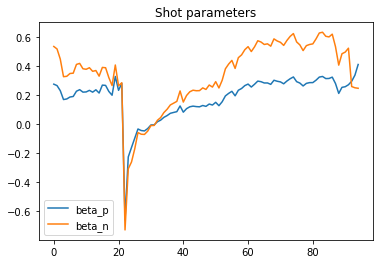

In [108]:
plt.figure()
plt.title('Shot parameters')
plt.plot(test_shot['beta_p'],label='beta_p')
plt.plot(test_shot['beta_n'],label='beta_n')
plt.legend()

In [16]:
disruption_shots

,shot,t_disrupt
0,930519014,0.1240
1,930519019,0.1130
2,930519027,0.1210
3,930519028,0.1275
4,930520004,0.1195
...,...,...
13780,1160930037,1.6529
13781,1160930038,1.4175
13782,1160930039,1.3723
13783,1160930040,1.4963


# Using the shot class

In [110]:
importlib.reload(database)
importlib.reload(plasma)

<module 'plasma' from '/home/hmturner/Documents/disruption-warning-db-workflow/src/plasma.py'>

In [111]:
shot = plasma.Shot('cmod', 1150922001)
shot.data

<class 'numpy.ndarray'>
(85000, 16)
(85000,)
z_prog (16383,)
z_error (85000,)
ip (85000,)
dpcs (85000,)
pcs (16383,)
[]


,times,commit_hash,time_until_disrupt,ip,dip,dip_smoothed,ip_prog,dipprog_dt,ip_error,p_ohm,...,V_loop_efit,Wmhd,dWmhd_dt,ssep,n_over_ncrit,z_error,z_prog,z_cur,v_z,z_times_v_z
0,0.06,b'104a999',99.94,362075.570106,6.260080e+06,6.049903e+06,NaN,NaN,NaN,7.572598e+04,...,3.997224,-25292.869141,489418.858596,40.0,-0.140618,NaN,0.000000,NaN,NaN,NaN
1,0.08,b'104a999',99.92,482791.882656,5.876708e+06,6.013503e+06,NaN,NaN,NaN,1.031878e+06,...,3.908666,-15504.492188,217329.363454,40.0,-0.352229,NaN,-0.000105,NaN,NaN,NaN
2,0.10,b'104a999',99.90,588626.742084,1.954519e+06,4.660650e+06,NaN,NaN,NaN,1.237653e+06,...,3.586226,-16599.695312,73384.846673,40.0,-0.360872,NaN,-0.000316,NaN,NaN,NaN
3,0.12,b'104a999',99.88,656106.812500,1.568255e+06,1.066818e+06,NaN,NaN,NaN,2.206009e+06,...,3.225115,-12569.095703,295953.592536,40.0,-0.360295,NaN,-0.006300,NaN,NaN,NaN
4,0.14,b'104a999',99.86,685070.421658,1.568469e+06,1.530047e+06,NaN,NaN,NaN,1.349107e+06,...,2.842839,-4761.549805,153448.771796,40.0,-0.560931,NaN,-0.012100,NaN,NaN,NaN


In [68]:
set(list(test_shot.data.dtypes))

{dtype('int64'), dtype('float64'), dtype('O')}

In [69]:
set(list(shot.data.dtypes))

{dtype('float64'), dtype('O')}

In [ ]:
def create_new_timebase(shot):
    return timebase 

dbh = SQLHandler('disruption shot database')
disruption_shots = dbh.get_disruption_shots()
for disruption_shot_id,disruption_shot_time in disruption_shots:
    disruption_shot = Cmod_shot(disruption_shot_id,timebase='method') # 
    disruption_shot['times'] = f(shot) # Add logic to handle time key differently
    dbh.upload_shot(disruption_shot)


